# UNet Tissue Segmentation
This can be run in google Colab to demo training. Adapted from DL4MIA 2022 Unet.
https://github.com/dl4mia

## Initialize Colab environment
Clone the repo, install the packages, download the data, and ensure torch available.

In [1]:
# clone my notebook
!git clone https://github.com/obria006/unet_segmentation.git

Cloning into 'unet_segmentation'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 259 (delta 159), reused 188 (delta 88), pack-reused 0
Receiving objects: 100% (259/259), 7.88 MiB | 5.32 MiB/s, done.
Resolving deltas: 100% (159/159), done.


In [2]:
# change to the cloned unet repo
%cd unet_segmentation
!pip install torch torchvision
!pip install -e.

/content/unet_segmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/unet_segmentation
     |████████████████████████████████| 31.0 MB 101.5 MB/s 
     |████████████████████████████████| 120 kB 66.8 MB/s 
     |████████████████████████████████| 1.6 MB 52.4 MB/s 
     |████████████████████████████████| 82 kB 567 kB/s 
  Running setup.py develop for src


In [3]:
# download data
import os
import urllib.request
import zipfile
import shutil
def extract_data(zip_src, dst):
    """
        Extracts data in zip file at 'zip_src' to the 'dst' directory.
        ----------
        zip_src: string
            path to zip file
        dst: string
            Indicates the path to the directory where the data should be saved.

    """
    zip_name = os.path.basename(zip_src)
    zip_name_no_ext = zip_name.strip(".zip")
    zip_path = os.path.join(dst, zip_name)

    if (os.path.exists(os.path.join(dst, zip_name_no_ext))):
        print(f"Destination directory already exists at: {os.path.abspath(os.path.join(dst, zip_name_no_ext))}")
    else:
        os.makedirs(os.path.join(dst, zip_name_no_ext))
        with zipfile.ZipFile(zip_src, 'r') as zip_ref:
            zip_ref.extractall(dst)

extract_data(
    zip_src = f"{os.getcwd()}/data/export/crop_uncrop_mix.zip",
    dst = f"{os.getcwd()}/data/processed"
)

In [4]:
# Confirm torch cuda available
import torch
print(torch.cuda.is_available())

True


## Start training


Training dictionary:
kwargs:
  data_dir: data/processed/crop_uncrop_mix
  data_type: train
  size: 465
  transform:
    NumpyToTensor:
      img_dtype: float
      mask_dtype: short
    RandomJitter:
      brightness: 0.3
      contrast: 0.3
      p: 0.3
    RandomRotationTransform:
      angles:
      - 90
    RandomFlip: {}
    ResizeTransform:
      size: !!python/tuple
      - 128
      - 128
batch_size: 16
workers: 1


Validation dictionary:
kwargs:
  data_dir: data/processed/crop_uncrop_mix
  data_type: val
  size: 130
  transform:
    NumpyToTensor:
      img_dtype: float
      mask_dtype: short
    RandomJitter:
      brightness: 0.3
      contrast: 0.3
      p: 0.3
    RandomRotationTransform:
      angles:
      - 90
    RandomFlip: {}
    ResizeTransform:
      size: !!python/tuple
      - 128
      - 128
batch_size: 16
workers: 1


Test dictionary:
kwargs:
  data_dir: data/processed/crop_uncrop_mix
  data_type: test
  size: 60
  transform: null
batch_size: 16
workers: 1


M

100%|██████████| 8/8 [00:00<00:00, 12.04it/s]

===> train loss: 0.44
===> val loss: 0.21, val ap: 0.94


=> saving checkpoint
Starting epoch 1
learning rate: 0.0004977494364660346


100%|██████████| 8/8 [00:00<00:00, 11.83it/s]

===> train loss: 0.30
===> val loss: 0.17, val ap: 0.94


=> saving checkpoint
Starting epoch 2
learning rate: 0.0004954977417064171


100%|██████████| 8/8 [00:00<00:00, 12.19it/s]

===> train loss: 0.27
===> val loss: 0.17, val ap: 0.95


=> saving checkpoint
Starting epoch 3
learning rate: 0.0004932449094349202


100%|██████████| 8/8 [00:00<00:00, 12.14it/s]

===> train loss: 0.25
===> val loss: 0.14, val ap: 0.96


=> saving checkpoint
Starting epoch 4
learning rate: 0.0004909909332982877


100%|██████████| 8/8 [00:00<00:00, 11.89it/s]

===> train loss: 0.25
===> val loss: 0.17, val ap: 0.95


=> saving checkpoint
Starting epoch 5
learning rate: 0.0004887358068751748


100%|██████████| 8/8 [00:00<00:00, 12.00it/s]

===> train loss: 0.20
===> val loss: 0.14, val ap: 0.95


=> saving checkpoint
Starting epoch 6
learning rate: 0.0004864795236750653


100%|██████████| 8/8 [00:00<00:00, 12.22it/s]

===> train loss: 0.18
===> val loss: 0.14, val ap: 0.96


=> saving checkpoint
Starting epoch 7
learning rate: 0.00048422207713716544


100%|██████████| 8/8 [00:00<00:00, 12.10it/s]

===> train loss: 0.18
===> val loss: 0.17, val ap: 0.95


=> saving checkpoint
Starting epoch 8
learning rate: 0.00048196346062927547


100%|██████████| 8/8 [00:00<00:00, 12.10it/s]

===> train loss: 0.22
===> val loss: 0.13, val ap: 0.96
=> saving checkpoint


Starting epoch 9
learning rate: 0.00047970366744663594


100%|██████████| 8/8 [00:00<00:00, 11.94it/s]

===> train loss: 0.17
===> val loss: 0.13, val ap: 0.96


=> saving checkpoint
Starting epoch 10
learning rate: 0.00047744269081074987


100%|██████████| 8/8 [00:00<00:00, 12.26it/s]

===> train loss: 0.17
===> val loss: 0.15, val ap: 0.96


=> saving checkpoint
Starting epoch 11
learning rate: 0.0004751805238681794


100%|██████████| 8/8 [00:00<00:00, 11.88it/s]

===> train loss: 0.17
===> val loss: 0.13, val ap: 0.96


=> saving checkpoint
Starting epoch 12
learning rate: 0.000472917159689316


100%|██████████| 8/8 [00:00<00:00, 11.75it/s]

===> train loss: 0.20
===> val loss: 0.16, val ap: 0.95


=> saving checkpoint
Starting epoch 13
learning rate: 0.00047065259126712457


100%|██████████| 8/8 [00:00<00:00, 12.04it/s]

===> train loss: 0.16
===> val loss: 0.13, val ap: 0.96


=> saving checkpoint
Starting epoch 14
learning rate: 0.00046838681151585874


100%|██████████| 8/8 [00:00<00:00, 12.08it/s]

===> train loss: 0.11
===> val loss: 0.09, val ap: 0.97
=> saving checkpoint


Starting epoch 15
learning rate: 0.0004661198132697498


100%|██████████| 8/8 [00:00<00:00, 12.32it/s]

===> train loss: 0.13
===> val loss: 0.12, val ap: 0.96


=> saving checkpoint
Starting epoch 16
learning rate: 0.0004638515892816641


100%|██████████| 8/8 [00:00<00:00, 12.20it/s]

===> train loss: 0.10
===> val loss: 0.13, val ap: 0.96


=> saving checkpoint
Starting epoch 17
learning rate: 0.00046158213222173284


100%|██████████| 8/8 [00:00<00:00, 12.10it/s]

===> train loss: 0.09
===> val loss: 0.09, val ap: 0.98


=> saving checkpoint
Starting epoch 18
learning rate: 0.0004593114346759497


100%|██████████| 8/8 [00:00<00:00, 12.01it/s]

===> train loss: 0.10
===> val loss: 0.11, val ap: 0.97


=> saving checkpoint
Starting epoch 19
learning rate: 0.00045703948914473726


100%|██████████| 8/8 [00:00<00:00, 11.78it/s]

===> train loss: 0.10
===> val loss: 0.11, val ap: 0.97
=> saving checkpoint


Starting epoch 20
learning rate: 0.00045476628804148113


100%|██████████| 8/8 [00:00<00:00, 10.58it/s]

===> train loss: 0.09
===> val loss: 0.10, val ap: 0.97


=> saving checkpoint
Starting epoch 21
learning rate: 0.00045249182369103055


100%|██████████| 8/8 [00:00<00:00, 10.39it/s]

===> train loss: 0.08
===> val loss: 0.10, val ap: 0.97
=> saving checkpoint


Starting epoch 22
learning rate: 0.00045021608832816447


100%|██████████| 8/8 [00:00<00:00, 10.78it/s]

===> train loss: 0.09
===> val loss: 0.09, val ap: 0.97


=> saving checkpoint
Starting epoch 23
learning rate: 0.0004479390740960227


100%|██████████| 8/8 [00:00<00:00, 11.84it/s]

===> train loss: 0.08
===> val loss: 0.22, val ap: 0.93


=> saving checkpoint
Starting epoch 24
learning rate: 0.00044566077304449995


100%|██████████| 8/8 [00:00<00:00, 12.04it/s]

===> train loss: 0.10
===> val loss: 0.11, val ap: 0.96
=> saving checkpoint


Starting epoch 25
learning rate: 0.00044338117712860363


100%|██████████| 8/8 [00:00<00:00, 12.26it/s]

===> train loss: 0.08
===> val loss: 0.11, val ap: 0.96
=> saving checkpoint


Starting epoch 26
learning rate: 0.00044110027820677195


100%|██████████| 8/8 [00:00<00:00, 12.30it/s]

===> train loss: 0.07
===> val loss: 0.09, val ap: 0.97
=> saving checkpoint


Starting epoch 27
learning rate: 0.000438818068039153


100%|██████████| 8/8 [00:00<00:00, 12.20it/s]

===> train loss: 0.10
===> val loss: 0.09, val ap: 0.97


=> saving checkpoint
Starting epoch 28
learning rate: 0.000436534538285843


100%|██████████| 8/8 [00:00<00:00, 12.28it/s]

===> train loss: 0.09
===> val loss: 0.10, val ap: 0.97
=> saving checkpoint


Starting epoch 29
learning rate: 0.00043424968050508256


100%|██████████| 8/8 [00:00<00:00, 11.89it/s]

===> train loss: 0.08
===> val loss: 0.10, val ap: 0.97


=> saving checkpoint


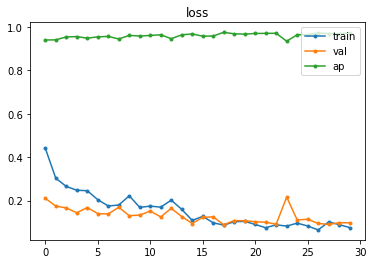

In [5]:
from src.models.dl4mia_tissue_unet import train
data_dir = "data/processed/crop_uncrop_mix"
output_dir = "results"
n_epochs = 30
train.main(data_dir=data_dir, output_dir = output_dir, n_epochs=n_epochs)

## Predictions

[INFO] loading up test image paths...
[INFO] loading up model...
Loaded checkpoint: results/20220824_134602/best.pth
	epoch = 17
	val_loss = 0.0889429496601224
	val_ap = 0.9758700130534939
	best_ap = 0.9758700130534939
	train_cuda = True
	model_dict = {'name': 'unet', 'kwargs': {'num_classes': 1, 'depth': 3, 'in_channels': 1}}
Initializing a U-Net with depth = 3, in-channels = 1 and num_classes = 1.
Load time: 0.06321573257446289
Predict time: 0.18650102615356445
Predict time: 0.003507852554321289
Predict time: 0.006018161773681641
Predict time: 0.0035910606384277344
Predict time: 0.0037794113159179688


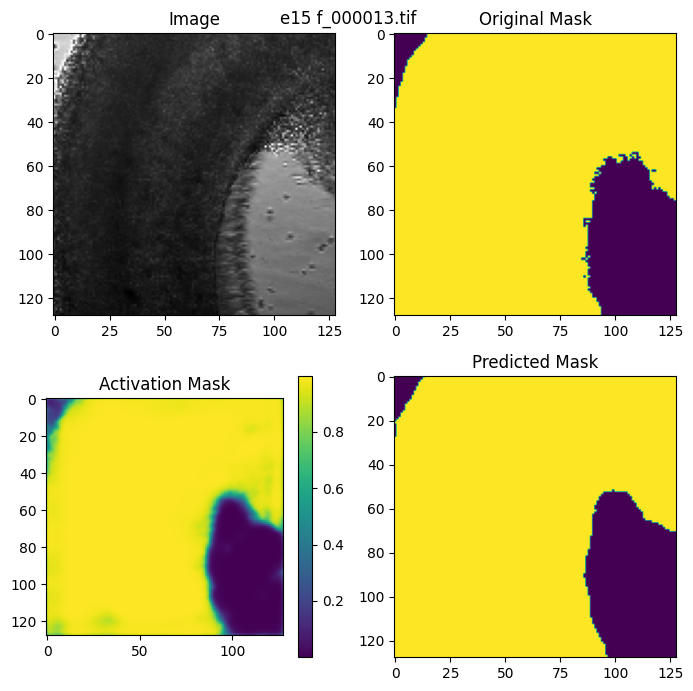

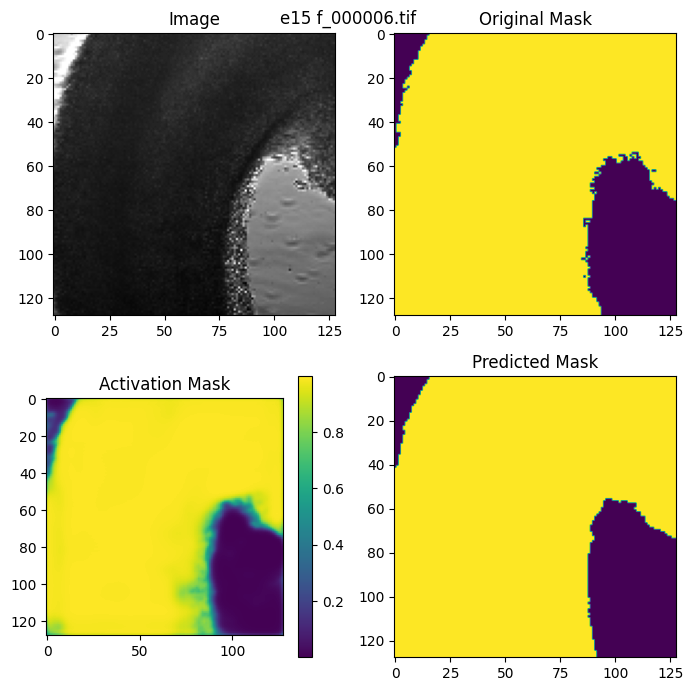

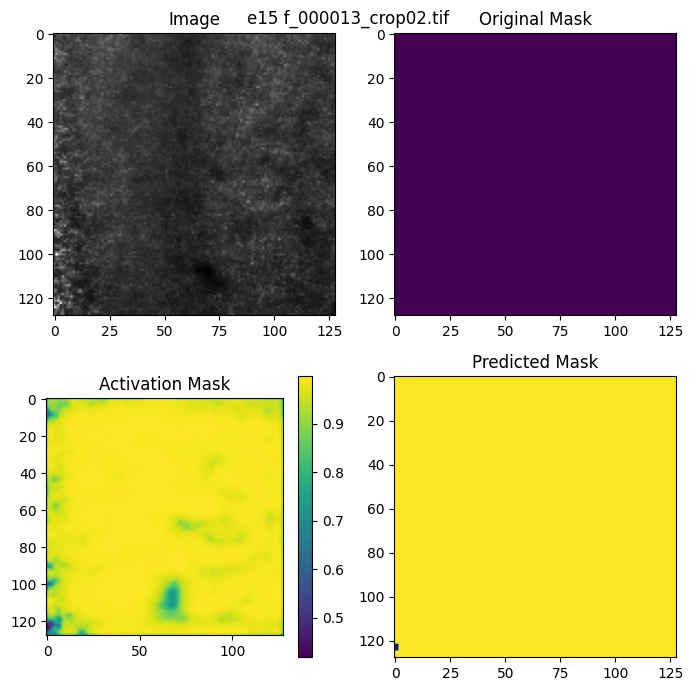

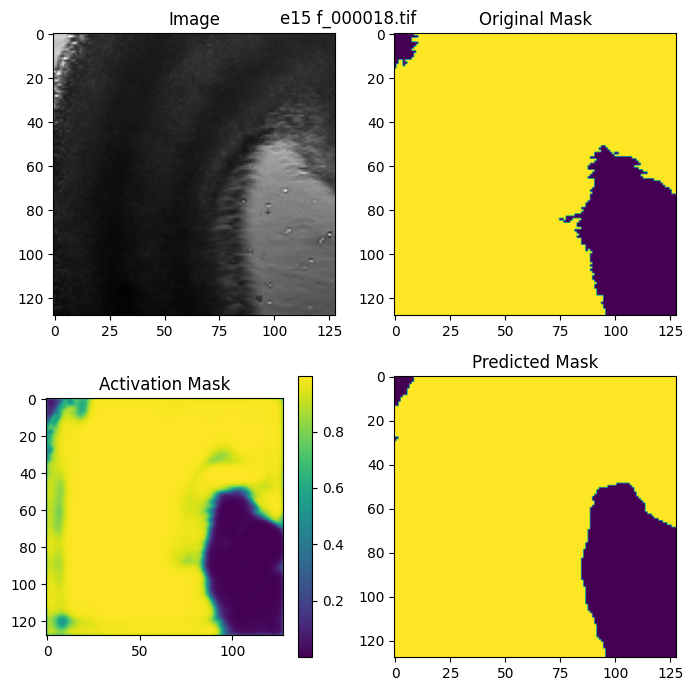

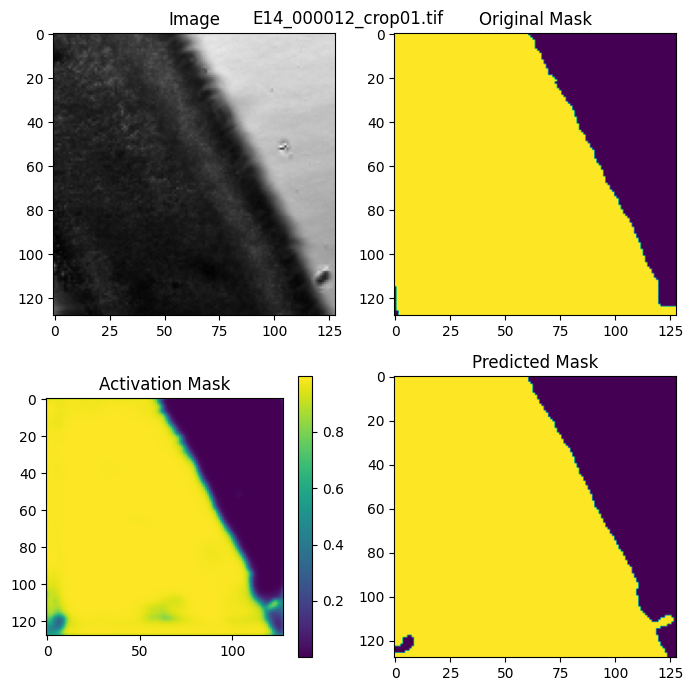

In [6]:
from src.models.dl4mia_tissue_unet import predict
import glob
res_dirs = glob.glob(f"{output_dir}/*")
if res_dirs != []:
  result_dir = res_dirs[-1]
  ckpt_name = "best.pth"
  predict.main(result_dir, ckpt_name)

## Download results


In [9]:
!zip -r /content/results.zip /content/unet_segmentation/results
from google.colab import files
files.download("/content/results.zip")

  adding: content/unet_segmentation/results/ (stored 0%)
  adding: content/unet_segmentation/results/20220824_134602/ (stored 0%)
  adding: content/unet_segmentation/results/20220824_134602/config_dict.yaml (deflated 14%)
  adding: content/unet_segmentation/results/20220824_134602/model_dict.yaml (deflated 6%)
  adding: content/unet_segmentation/results/20220824_134602/best.pth (deflated 4%)
  adding: content/unet_segmentation/results/20220824_134602/train_dataset_dict.yaml (deflated 44%)
  adding: content/unet_segmentation/results/20220824_134602/loss.csv (deflated 51%)
  adding: content/unet_segmentation/results/20220824_134602/last.pth (deflated 4%)
  adding: content/unet_segmentation/results/20220824_134602/test_dataset_dict.yaml (deflated 20%)
  adding: content/unet_segmentation/results/20220824_134602/val_dataset_dict.yaml (deflated 44%)
  adding: content/unet_segmentation/results/20220824_134602/loss.png (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>